# Notebook file for testing code without cluttering the .py files

import libraries:

In [22]:
import numpy as np
import matplotlib.pyplot as plt

import local files:

In [23]:
import bicyclemodel
from bicyclemodel import KinematicBicycleModel 
from bicyclemodel import RK4
from bicyclemodel import euler 

    * todo
    * draw workspace
    * draw vehicle
    * simulate vehicle 
    * use keys to control vehicle

In [24]:
def testfunction_single(s):
    w = np.cos(s) - s + np.sqrt(s)
    return w

def testfunction_vector(s):
    #print(f"inside test function,s:{s}")
    x,y,z = s

    u = x**2 - z + 2.0*y
    v = y*z - x
    k = 3
    w = np.array([u,v,k])
    #print(f"inside test function,w:{w}")
    return w

timestep = 0.1
endtime = 300

H0  = 10
Hr = H0
d = 1
L =10
Ds2 = 20
Dr2 =100
g = 9.81
fr = 0.01 #friction factor
gam = 0
vel0 = np.sqrt((2*g*Hr*d)/(L*fr+d))
Hs0 = (Hr*d)/(L*fr+d)

def watersys(y): # system function

    H0  = 10
    Hr = H0
    d = 1
    L =10
    Ds2 = 20
    Dr2 =100
    g = 9.81
    fr = 0.01 #friction factor
    gam = 0

    H,v = y
    ve = np.sqrt(2*gam*g*H)
    dHs = (d/np.sqrt(Ds2))**2 * (v-ve)
    dv  = (g*(Hr-H) - (L/d)*(fr/2)*np.abs(v)*v)/L

    w = np.array([dHs,dv])

    return w


In [25]:
y = np.array([3,4,5])
euler(testfunction_vector,y,0.1)

array([4.2, 5.7, 5.3])

In [26]:
#y = (3,4,5)
y = np.array([3,4,5]) 
RK4(testfunction_vector,y,0.1)

array([4.36117237, 5.47645768, 5.2       ])

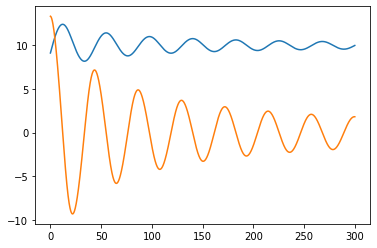

In [27]:
outputarrayx = []
outputarrayy = []

ynew =  [Hs0,vel0]

yprev = ynew
abstime = 0

while True:
   
    yprev = ynew
    ynew = RK4(watersys,yprev,timestep)

   # append!(outputarrayx,ynew[1])
   # append!(outputarrayy,ynew[2])
    outputarrayx.append(ynew[0])
    outputarrayy.append(ynew[1])
    abstime = abstime + timestep
    if abstime > endtime:
        break
    
timearray = np.linspace(0,endtime,len(outputarrayx))

plt.plot(timearray,outputarrayx)
plt.plot(timearray,outputarrayy)
plt.show()

In [28]:
car = KinematicBicycleModel()
dt = bicyclemodel.dt

abstime = 0
endtime = 300

output_rk4 = []

while True:
    
    

    if abstime < 30:
        throttle = 0.5
    else:
        throttle = 0
    steering = np.sin(abstime*0.01)*0.1
    output_rk4.append([car.x,car.y,car.yaw,car.v,throttle,steering,abstime])

    

    car.update(throttle,steering,method="RK4")

    abstime = abstime + dt
    if abstime > endtime:
        break


output_rk4 = np.asarray(output_rk4)

In [29]:
car = KinematicBicycleModel()
dt = bicyclemodel.dt

abstime = 0
endtime = 300

output_euler = []

while True:
    
    

    if abstime < 30:
        throttle = 0.5
    else:
        throttle = 0
    steering = np.sin(abstime*0.01)*0.1
    output_euler.append([car.x,car.y,car.yaw,car.v,throttle,steering,abstime])

    

    car.update(throttle,steering,method="euler")

    abstime = abstime + dt
    if abstime > endtime:
        break


output_euler = np.asarray(output_euler)

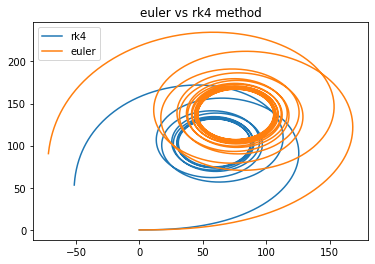

In [31]:
plt.plot(output_rk4[:,0],output_rk4[:,1],label='rk4')
plt.plot(output_euler[:,0],output_euler[:,1],label='euler')
plt.title('euler vs rk4 method')
plt.legend()
plt.show()